# Find the James Webb Space Telescope

This example notebooks calculates the position in the sky of the James Webb Space Telescope when viewed from Earth. It allows to find it in the sky with your telescope. The JWST is very faint (around 15th magnitude), so one would need to take photos with a rather long exposure to see it.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import datetime
from astropy.coordinates import EarthLocation, TEME
import astropy.units as u

import satastro

We'll look at the JWST's position from now and for a duration of 3 days.

In [2]:
today = datetime.datetime.now()
length = datetime.timedelta(days=3)

First, we download the JWST's cartesian position around the Earth thanks to NASA JPL Horizons application.

In [3]:
horizons_args_vec = {'COMMAND':'JWST',       # Target
                     'OBJ_DATA':'YES',
                     'MAKE_EPHEM':'YES',
                     'TABLE_TYPE':'VECTORS',
                     'CENTER':'geo',
                     'REF_PLANE':'FRAME',
                     'START_TIME':today.isoformat(), # Start date of ephemerides
                     'STOP_TIME':(today+length).isoformat(),  # End date of ephemerides
                     'STEP_SIZE':'1 MINUTES',   # Time step of ephemerides
                     'TIME_TYPE':'UT',
                     'CSV_FORMAT':'YES',}
jwst_horizons_vec_text = satastro.request_horizons(**horizons_args_vec)
jwst_horizons_vec = satastro.horizons_to_dataframe(jwst_horizons_vec_text)
jwst_teme = satastro.horizons_to_TEME(jwst_horizons_vec)

We define the location on Earth of our observatory.

In [4]:
loc = EarthLocation(lat=46.53, lon=6.57, height=300) #EPFL

We can then plot the altitude (or elevation) of the JWST in the sky, overlayed with the nights. Because the JWST is positioned at Earth-Sun L2 point, it always appears during the night !

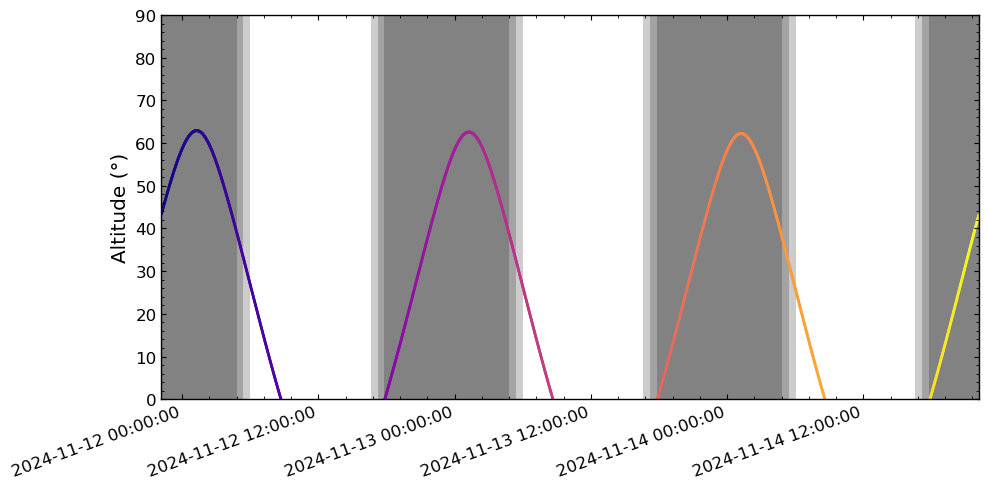

In [5]:
satastro.airmass_plot(jwst_teme, loc)

We can now calculate the RA-Dec position in the sky of the JWST viewed from our observatory.

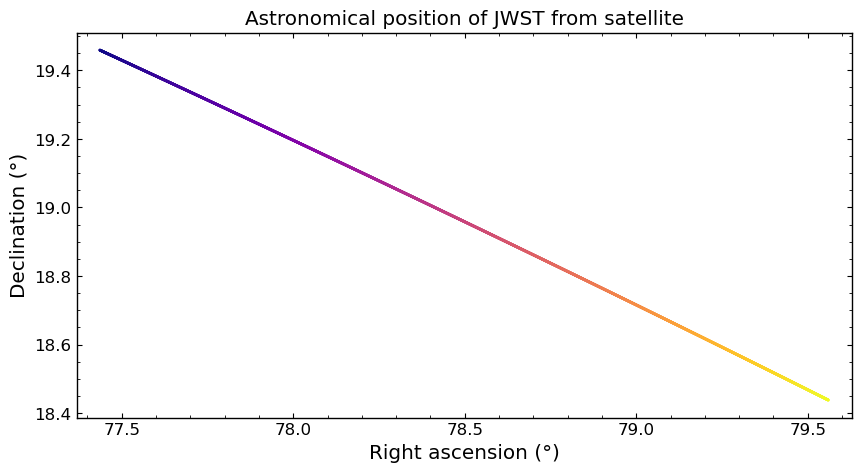

In [6]:
fig, ax = plt.subplots(figsize=(10,5))
jwst_sat_radec, jwst_sat_color = satastro.astrometry_target_plot(jwst_teme, observer=loc,
                                                                 target_name='JWST', 
                                                                 fig=fig, ax=ax, 
                                                                 return_radec=True, return_color=True)
plt.show()

Finally, we plot the star field around the JWST to help localizing it. Here, we choose a FOV of 5x5° but you can change it to fit your camera. We also plot all JWST's positions during 3 days, centered on the middle one, but you can choose to only plot the one at a specific time.

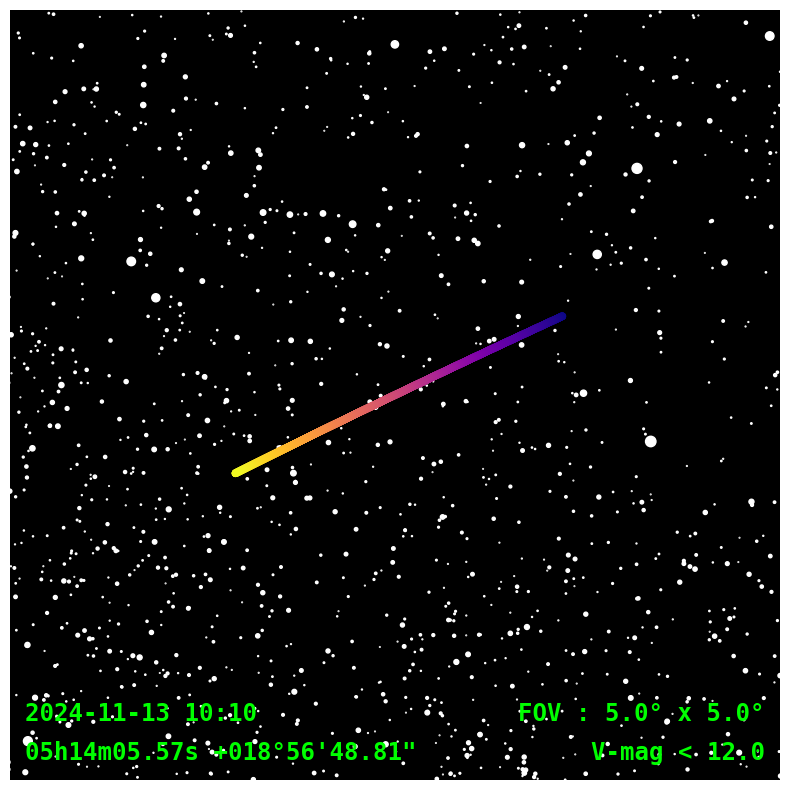

In [7]:
fig, ax = plt.subplots(figsize=(8,8))
satastro.plot_field(jwst_sat_radec[len(jwst_sat_radec)//2], field_fov=(5,5)*u.deg, 
                    epoch=jwst_teme[len(jwst_sat_radec)//2].obstime,
                    limiting_mag=12.0,
                    legend=True,
                    invert=False, fig=fig, ax=ax)
ax.scatter(jwst_sat_radec.ra, jwst_sat_radec.dec, color=jwst_sat_color, s=20, label='JWST')
plt.show()